# Edge Detection on 2-D images:  Comparision of different approaches

-------------------------------------

#### By - Nandini Sharma, 200101122
#### For- DA623 report 2024

------------------------------------
## Introduction -
Edge detection is a fundamental process in image processing aimed at identifying boundaries within an image. These boundaries typically represent significant changes in intensity or color, signifying transitions from one region of an image to another. The detection of edges plays a crucial role in various computer vision tasks, including object detection, segmentation, and image recognition.In essence, edges represent the local contrast variations in an image and are often associated with important features such as object boundaries, contours, and texture boundaries.In image processing, edge detection algorithms aim to locate and highlight these significant transitions by identifying points or regions where intensity or color gradients are particularly strong.
These algorithms typically operate by analyzing the spatial variations in pixel values across the image and applying mathematical operations or filters to enhance or emphasize regions corresponding to edges while suppressing noise and irrelevant details.
The output of edge detection algorithms is usually a binary image or a map highlighting the detected edges as a set of connected curves or contours. These edges can then be further processed, analyzed, or used as features in subsequent stages of image processing pipelines.

-----
## Purpose of this report -
This report aims to provide various edge detection algorithms and compare their performance over 2D images in a tutorial like fashion.

---------
## Background -

### The concept of edges in images and their importance -

In a digital image, edges represent significant local changes in intensity, marking the transition between two regions. Imagine a picture – the edge is where a dark object meets a bright background, or where the texture of a wall abruptly changes to a window.An edge in an image can be due to depth, orientation, illumination or colour discontinuity.

Here's why edges are crucial in image processing:

Capture Image Structure: Edges essentially outline the "shape" of objects in the image. By identifying edges, we can start to understand the layout and composition of the scene.

Foundation for Higher-Level Tasks:  Edge detection is a fundamental step in many computer vision applications. It paves the way for more complex tasks like:

* Object Recognition: By analyzing edge patterns, we can start to recognize specific objects in the image. For instance, a closed loop of edges with a specific shape might indicate a face.
* Image Segmentation: Edges help separate different parts (or segments) of the image. This is essential for tasks like segmenting a cat from its background or identifying individual lanes on a road.
* Motion Detection: Edges are often used in motion detection algorithms. By tracking changes in edges between frames, we can identify moving objects.
* Data Reduction:  Focusing on edges allows us to discard unnecessary details and concentrate on the most critical information in the image, reducing the amount of data to process for further analysis.

It is challenging to identify edges in an image since the images represented digitally are discrete and full of noise - whereas the real world edges are continuous.

In essence, edges act as a kind of visual roadmap within an image. By understanding them, we can unlock a deeper understanding of the image content and perform higher-level image processing tasks.


### Characteristics of a good edge detector -
We want an edge detector which can figure out edge position, edge magnitude and edge orientation.
A good edge detector in image processing should ideally achieve a balance between several key characteristics:
* Good Detection: This refers to the detector's ability to accurately identify actual edges in the image. It should minimize false positives and false negatives.

* Good Localization: The detected edges should be precisely located as close as possible to the true edges in the image. Inaccurate localization can blur important details.
* Single Response Constraint: Ideally, the detector should produce only one response for each true edge point. This avoids generating multiple detections around the same edge due to noise or filtering artifacts.

* Noise Rejection: Real-world images often contain noise that can lead to false edge detections. A good edge detector should be robust to noise and minimize its influence on edge identification.

* Directional Sensitivity (Optional): Some applications might benefit from detecting edges with specific orientations (horizontal, vertical, diagonal). A good detector might offer options for directional sensitivity depending on the task.

* Computational Efficiency: For real-time applications, processing speed can be crucial. While complex algorithms might offer better results, simpler detectors can be faster.

In practice, there's often a trade-off between these characteristics. For instance, a highly sensitive detector might catch more edges but also introduce more noise.  The choice of the best edge detector depends on the specific image characteristics and the desired outcome of the application.

### How to evaluate edge detection algorithms -

There are two main categories of metrics used for evaluating edge detection algorithms:

1. Correspondence-based metrics: These metrics require a ground truth image (a human-labeled image with the "true" edges marked) for comparison with the edges detected by the algorithm.

* Precision:  This measures the ratio of correctly detected edges (True Positives) to the total number of edges identified by the algorithm (including both True Positives and False Positives). A high precision indicates the detector generates few false alarms.

* Recall: This measures the ratio of correctly detected edges (True Positives) to the total number of actual edges present in the ground truth image. A high recall indicates the detector finds most of the real edges.

* F1 Score: This is the harmonic mean of precision and recall, providing a single metric to balance both aspects.

* Jaccard Index (or Intersection over Union - IoU): This metric calculates the area of overlap between the detected edges and the ground truth edges divided by the total combined area. A higher IoU indicates a better match between the detected and actual edges.

2. Non-correspondence based metrics: These metrics don't require a ground truth image but might be less intuitive to interpret.

* Mean Squared Error (MSE): This measures the average squared difference between the intensity values of corresponding pixels in the original image and the edge image produced by the detector. A lower MSE indicates a closer match between the original image and the detected edges.

* Peak Signal-to-Noise Ratio (PSNR): This metric is related to MSE and is often used in image compression. A higher PSNR indicates a better signal (the original image) compared to the noise introduced by the edge detection process.

In [ ]:
#I have used files stored in google drive. You must change the path to files (pegion.jpg, Lines.jpg,hed_pretrained_bsds.caffemodel,deploy.prototxt)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Methodology -

### We will study the following edge detection algorithms -
* gradient based filters -
1. **roberts** :
The Roberts filter is a simple edge detection operator that uses a pair of 2x2 convolution kernels to detect edges in images. It calculates the gradient approximation by computing the difference between pixel intensities along the diagonal directions. While computationally lightweight, the Roberts filter may suffer from noise sensitivity and limited edge orientation detection capabilities.
2. **prewitt**: The Prewitt filter is an edge detection operator that computes the gradient approximation using a pair of 3x3 convolution kernels, one for horizontal and the other for vertical edge detection. It applies weighted averaging to neighboring pixels to estimate the gradient magnitude and direction. While effective for basic edge detection tasks, the Prewitt filter may produce thicker edges and be sensitive to noise.
3. **sobel 3*3** :The Sobel filter is another popular edge detection operator that approximates the gradient using 3x3 convolution kernels for horizontal and vertical edge detection. It applies convolution with Sobel masks to compute the gradient magnitude and direction, which helps in detecting edges with better localization. While offering improved performance over simpler filters like Roberts and Prewitt, the Sobel filter may still be sensitive to noise in images.
4. **canny edge detector** - The Canny edge detector is a multi-stage algorithm widely used for edge detection in images. It begins by smoothing the image with a Gaussian filter to reduce noise, followed by computing gradient magnitudes and directions. Non-maximum suppression is then applied to thin edges, and finally, hysteresis thresholding is used to identify and connect edges. Known for its accuracy and robustness, the Canny edge detector is suitable for various computer vision applications.
* laplacian and zero crossing based methods -
5. **LoG** -The LoG filter is an edge detection technique that combines Gaussian blurring with the Laplacian operator to detect edges in images. It first convolves the image with a Gaussian kernel to smooth out noise and then applies the Laplacian operator to highlight regions of rapid intensity change. The resulting image represents the second derivative of the Gaussian-smoothed image, enhancing edges while suppressing noise. LoG is effective for detecting edges at multiple scales and is often used in computer vision tasks requiring precise edge localization.
6. **DoG** - The DoG filter is a simplified approximation of the LoG filter, achieved by subtracting two Gaussian-smoothed versions of an image at different scales. By subtracting a coarser-scale image from a finer-scale one, DoG enhances edges while suppressing low-frequency components, effectively highlighting regions of rapid intensity change. DoG is computationally more efficient than LoG and is commonly used for real-time edge detection applications, such as robotics and video processing.
* Neural networks based methods -
7. **HED** - HED is an advanced edge detection method based on deep learning techniques. It employs a holistically-nested neural network architecture to extract hierarchical edge features from images, enabling high-precision edge detection across multiple scales and levels of abstraction. HED is trained end-to-end on large datasets, allowing it to learn complex edge patterns directly from the data. It offers superior edge detection performance compared to traditional methods like Canny or Sobel filters and is widely used in computer vision applications requiring accurate edge localization.

### Why did we choose these algorithms?
These algorithms represent some popoular edge detection algorithms used throughout the scientific community. And they cover various different approaches.
### Images selected-
We test all algorithms on two images - pegion.jpg and Lines.jpg
### Image preprocessing -
To test the performance of various approaches, we add noise to the images.
We add random noise to pegion.jpg and salt and pepper noise to Lines.jpg
We will work on grayscale images only.



In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.image as mpimg
from scipy import signal
from scipy import ndimage
import cv2

def rgb2gray(rgb_image):
    #the standard weights used for grayscale conversion
    return np.dot(rgb_image[...,:3], [0.299, 0.587, 0.114])

def extractValueChannel(rgb_image):
    # Convert RGB image to HSV color space
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Extract the value channel (brightness)
    value_channel = hsv_image[:, :, 2]

    return value_channel

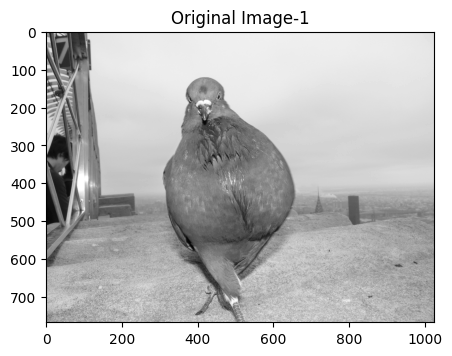

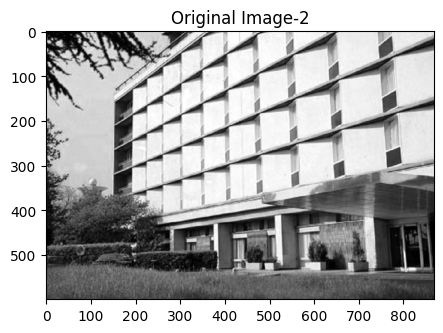

In [81]:

#reading first image
image1 = mpimg.imread("/content/drive/MyDrive/da_623/pegion.jpg")
image_gr1 = rgb2gray( image1 )

#reading second image
image2 = mpimg.imread("/content/drive/MyDrive/da_623/Lines.jpg")
image_gr2 = extractValueChannel(image2)


# plotting both images
figureSize = (5,5)
plt.figure("Original Image-1", figsize=figureSize)
plt.title("Original Image-1")
plt.imshow(image_gr1)
plt.set_cmap("gray")

plt.figure("Original Image-2", figsize=figureSize)
plt.title("Original Image-2")
plt.imshow(image_gr2)
plt.set_cmap("gray")

In [82]:
#adding noise - changing weight will change noise
def add_noise(image_gr):
    # function to add random noise
    weight = 0.9
    noisy = image_gr + weight * image_gr.std() * np.random.random(image_gr.shape)
    return noisy

def salt_n_pepper(img):
    # function to add salt and pepper noise
    salt_pepper = np.random.random(img.shape) * 255

    # right now we are not adding salt and pepper noise. You may change the below
    # numbers to get noisy images to test results on noisy images.
    pepper = salt_pepper < 5;
    salt = salt_pepper > 250;

    img[pepper] = 0
    img[salt] = 255

    return img


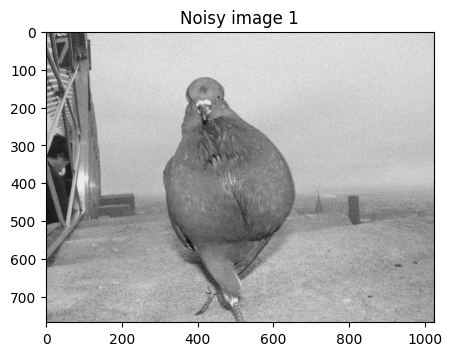

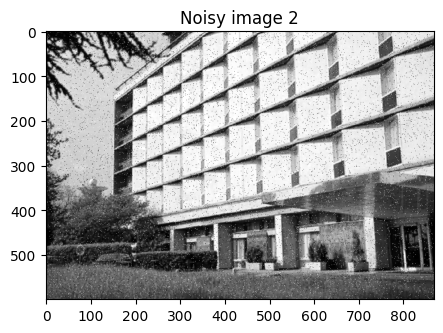

In [83]:
#adding noise to images.
# you may change the parameters in above noise functions to get different images

#adding random noise to image1
noisy_1=add_noise(image_gr1)

#adding salt and pepper noise to image2
noisy_2=salt_n_pepper(image_gr2)

#plotting both noisy images
plt.figure("Noisy Image 1", figsize=figureSize)
plt.title("Noisy image 1")
plt.imshow(noisy_1)

plt.figure("Noisy Image 2", figsize=figureSize)
plt.title("Noisy image 2")
plt.imshow(noisy_2)

### Let us try some image denoising techniques :

These techniques may be helpful in removing noise before applying the filters. It is upto you to use some of these denoising techniques.
We will look at box filter and gaussian filter

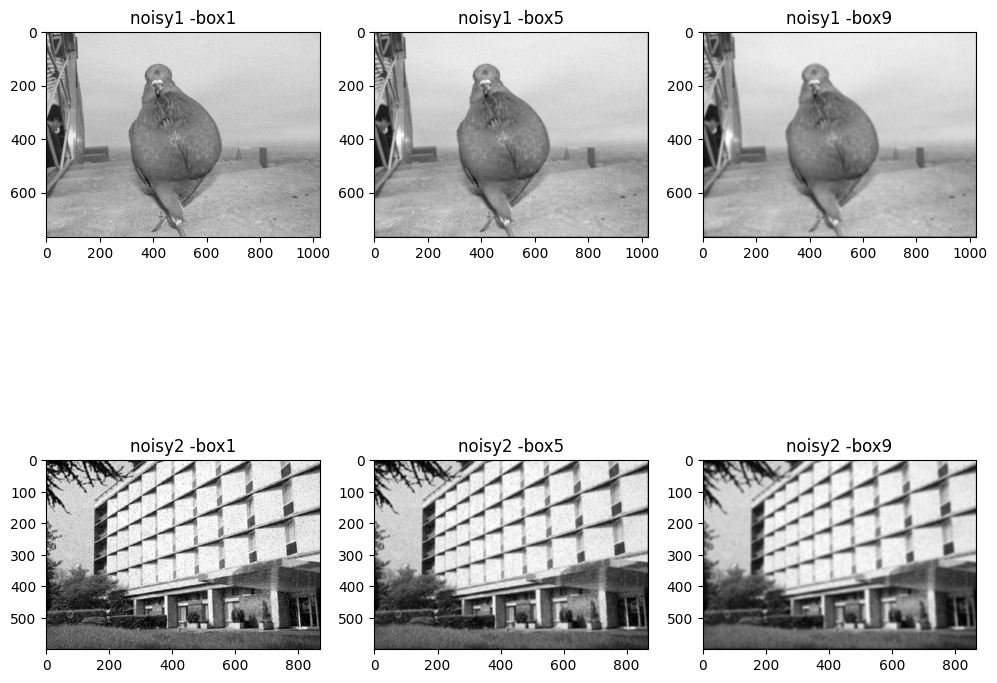

In [84]:
#image denoising using box filter

def box_filter( w ):
    return np.ones((w,w)) / (w*w)

# applying box filters of various sizes on noisy_1 image
filtered_img1_box1 = signal.convolve2d(noisy_1, box_filter( 1 ) ,'same')
filtered_img1_box5 = signal.convolve2d(noisy_1, box_filter( 5 ) ,'same')
filtered_img1_box9 = signal.convolve2d(noisy_1, box_filter( 9 ) ,'same')


# applying box filters of various sizes on noisy_2 image
filtered_img2_box1 = signal.convolve2d(noisy_2, box_filter( 1 ) ,'same')
filtered_img2_box5 = signal.convolve2d(noisy_2, box_filter( 5 ) ,'same')
filtered_img2_box9 = signal.convolve2d(noisy_2, box_filter( 9 ) ,'same')

# plotting the results
plt.figure("results for denoising using box plot",figsize=(12,10))
plt.subplot(2,3,1)
plt.imshow(filtered_img1_box1)
plt.title("noisy1 -box1")

plt.subplot(2,3,2)
plt.imshow(filtered_img1_box5)
plt.title("noisy1 -box5")


plt.subplot(2,3,3)
plt.imshow(filtered_img1_box9)
plt.title("noisy1 -box9")

plt.subplot(2,3,4)
plt.imshow(filtered_img2_box1)
plt.title("noisy2 -box1")

plt.subplot(2,3,5)
plt.imshow(filtered_img2_box5)
plt.title("noisy2 -box5")

plt.subplot(2,3,6)
plt.imshow(filtered_img2_box9)
plt.title("noisy2 -box9")

plt.show()

<ipython-input-85-40f36256c82d>:5: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)


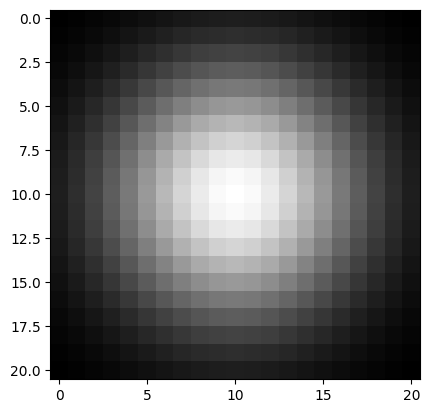

In [85]:
#image denoising using - Gaussian filetr - sigma is std deviation

def gaussian_kernel( kernlen , std ):
    """Returns a 2D Gaussian kernel array."""
    gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

plt.imshow(gaussian_kernel(21,5), interpolation='none')

<ipython-input-85-40f36256c82d>:5: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)


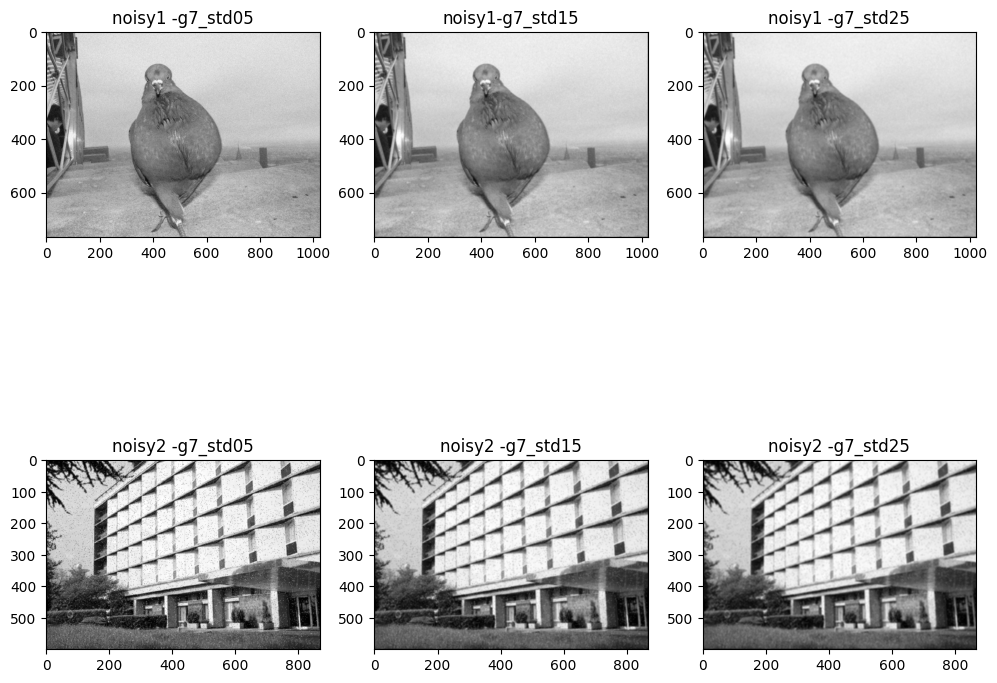

In [86]:

# applying gaussian filter of various sigma on noisy_1 image
filtered_img1_g7_std05 = signal.convolve2d(noisy_1, gaussian_kernel(7,0.5) ,'same')
filtered_img1_g7_std15 = signal.convolve2d(noisy_1, gaussian_kernel(7,1.5) ,'same')
filtered_img1_g7_std25 = signal.convolve2d(noisy_1, gaussian_kernel(7,2.5) ,'same')

# applying gaussian filter of various sigma on noisy_2 image
filtered_img2_g7_std05 = signal.convolve2d(noisy_2, gaussian_kernel(7,0.5) ,'same')
filtered_img2_g7_std15 = signal.convolve2d(noisy_2, gaussian_kernel(7,1.5) ,'same')
filtered_img2_g7_std25 = signal.convolve2d(noisy_2, gaussian_kernel(7,2.5) ,'same')

#plotting the results
plt.figure("results for denoising using gaussian filter",figsize=(12,10))

plt.subplot(2,3,1)
plt.imshow(filtered_img1_g7_std05)
plt.title("noisy1 -g7_std05")

plt.subplot(2,3,2)
plt.imshow(filtered_img1_g7_std15)
plt.title("noisy1-g7_std15")


plt.subplot(2,3,3)
plt.imshow(filtered_img1_g7_std25)
plt.title("noisy1 -g7_std25")

plt.subplot(2,3,4)
plt.imshow(filtered_img2_g7_std05 )
plt.title("noisy2 -g7_std05")

plt.subplot(2,3,5)
plt.imshow(filtered_img2_g7_std15)
plt.title("noisy2 -g7_std15")

plt.subplot(2,3,6)
plt.imshow(filtered_img2_g7_std25)
plt.title("noisy2 -g7_std25")

plt.show()

### Edge detection methods to be explored-


In [87]:
#edge detection - some famous kernels - gradient based methods
# We are using thresh - to produce binary edge map from the filtered image obtained.
def apply_filter(img,filt_h,filt_v):
    # function to apply filters using convolve function
    grad_h=signal.convolve2d( img , filt_h ,'same')
    grad_v=signal.convolve2d( img , filt_v ,'same')
    phase = np.arctan2(grad_h , grad_v) * (180.0 / np.pi)

    # Assign phase values to nearest [ 0 , 45 , 90 ,  135 ]
    phase = ((45 * np.round(phase / 45.0)) + 180) % 180;

    # gradient calculation
    gradient = np.sqrt(grad_h * grad_h + grad_v * grad_v)
    return gradient, phase

def roberts(img,thresh):
    roberts_h=np.array([[0,1],
                        [-1,0]])
    roberts_v=np.array([[1,0],
                        [0,-1]])


    # normalize the image t have values between 0 and 1
    img_norm = img/ 255.
    gradient,phase = apply_filter(img_norm,roberts_h,roberts_v)

    # rescale the gradient to get values between 0 and 255
    rescaled_img = rescale(gradient)

    # make all pixels below thresholdValue=0, and rest = 255
    thresholdValue = thresh
    output_image = np.maximum(rescaled_img, thresholdValue);
    output_image[output_image == round(thresholdValue)] = 0;
    output_image[output_image != round(0)] = 255;
    return output_image

def prewitt(img,thresh):
    prewitt_h = np.array([[ -1 , 0 , 1 ] ,
                          [ -1 , 0 , 1 ] ,
                          [ -1 , 0 , 1 ] ])
    prewitt_v = np.array([[ 1 , 1 , 1 ] ,
                          [ 0 , 0 , 0 ] ,
                          [ -1 , -1 , -1 ] ])
    # normalize the image t have values between 0 and 1
    img_norm = img/ 255.
    gradient,phase = apply_filter(img_norm,prewitt_h,prewitt_v)
    # rescale the gradient to get values between 0 and 255
    rescaled_img = rescale(gradient)
    # make all pixels below thresholdValue=0, and rest = 255
    thresholdValue = thresh
    output_image = np.maximum(rescaled_img, thresholdValue);
    output_image[output_image == round(thresholdValue)] = 0;
    output_image[output_image != round(0)] = 255;
    return output_image

def rescale( img ):
    return (img - img.min()) / (img.max() - img.min()) * 255

def sobel(img,thresh=50):
    sobel_h = np.array([[ -1 , 0 , 1 ] ,
                        [ -2 , 0 , 2 ] ,
                        [ -1 , 0 , 1 ]])
    sobel_v = np.array([[ 1 , 2 , 1 ] ,
                        [ 0 , 0 , 0 ] ,
                        [ -1 , -2 , -1 ]])
    # normalize the image t have values between 0 and 1
    img_norm = img/ 255.
    gradient,phase = apply_filter(img_norm,sobel_h,sobel_v)
    # rescale the gradient to get values between 0 and 255
    rescaled_img = rescale(gradient)
    # make all pixels below thresholdValue=0, and rest = 255
    thresholdValue = thresh
    output_image = np.maximum(rescaled_img, thresholdValue);
    output_image[output_image == round(thresholdValue)] = 0;
    output_image[output_image != round(0)] = 255;
    return output_image



def canny(img,thresh1=100,thresh2=200):
    #calling canny function from opencv
    # We are using L2 gradient
    # thresh1,thresh2 can be increased to remove unimportant edges
    cannyImage = cv2.Canny(np.uint8(img),thresh1,thresh2,apertureSize = 3,L2gradient=True);
    return cannyImage



In [88]:
# Second derivative based methods -

def zerosCrossing(src, thresh):
    """
    This function detects zero-crossing points in an image.

    Args:
        src: The input image as a NumPy array.
        thresh: The threshold value for considering a difference significant (float).

    Returns:
        A NumPy array of the same size as the input image,
        where pixels with strong zero-crossings are marked as 255 (white),
        and others are set to 0 (black).
    """

    # function for finding zero crossing points
    # Get the dimensions (width, height) of the input image
    dsize = (src.shape[1], src.shape[0])
    # Define kernels for shifting the image in different directions
    # These kernels are used for convolution to achieve a shifted version of the image

    # Left shift kernel
    M = np.array([[1, 0, -1], [0, 1, 0]], dtype=np.float32)
    shift_left = cv2.warpAffine(src, M, dsize)
    # Right shift kernel
    M = np.array([[1, 0, 1], [0, 1, 0]], dtype=np.float32)
    shift_right = cv2.warpAffine(src, M, dsize)
    # Upward shift kernel
    M = np.array([[1, 0,  0], [0, 1, -1]], dtype=np.float32)
    shift_up = cv2.warpAffine(src, M, dsize)
    # Downward shift kernel
    M = np.array([[1, 0,  0], [0, 1, 1]], dtype=np.float32)
    shift_down = cv2.warpAffine(src, M, dsize)
    # Diagonal shift kernels (combined horizontal and vertical shifts)
    M = np.array([[1, 0,  1], [0, 1, 1]], dtype=np.float32)
    shift_right_down = cv2.warpAffine(src, M, dsize)
    M = np.array([[1, 0,  -1], [0, 1, -1]], dtype=np.float32)
    shift_left_up = cv2.warpAffine(src, M, dsize)
    M = np.array([[1, 0,  1], [0, 1, -1]], dtype=np.float32)
    shift_right_up = cv2.warpAffine(src, M, dsize)
    M = np.array([[1, 0,  -1], [0, 1, 1]], dtype=np.float32)
    shift_left_down = cv2.warpAffine(src, M, dsize)

    # Calculate sign changes between original and shifted versions
    # This identifies potential zero-crossing points based on sign flips
    shift_left_right_sign = (shift_left * shift_right)
    shift_up_down_sign = (shift_up * shift_down)
    shift_rd_lu_sign = (shift_right_down * shift_left_up)
    shift_ru_ld_sign = (shift_right_up * shift_left_down)

    # Calculate absolute value of differences between original and shifted versions
    # This captures the magnitude of the intensity change
    shift_left_right_norm = abs(shift_left - shift_right)
    shift_up_down_norm = abs(shift_up - shift_down)
    shift_rd_lu_norm = abs(shift_right_down - shift_left_up)
    shift_ru_ld_norm = abs(shift_right_up - shift_left_down)
    # Identify candidate zero-crossing pixels based on sign change and threshold
    candidate_zero_crossing = \
        ((shift_left_right_sign < 0) & (shift_left_right_norm > thresh)).astype('uint8') +\
        ((shift_up_down_sign < 0) & (shift_up_down_norm > thresh)).astype('uint8') + \
        ((shift_rd_lu_sign < 0) & (shift_rd_lu_norm > thresh)).astype('uint8') + \
        ((shift_ru_ld_sign < 0) & (shift_ru_ld_norm > thresh)).astype('uint8')
    # This part combines the results from different directions
    # Explanation:
    # - Each term checks for two conditions:
    #   1. Sign change (`< 0`): This indicates a transition from positive to negative or vice versa between the original and shifted image.
    #   2. Difference magnitude (`> thresh`): This ensures the difference is significant enough using the provided threshold.
    # - The `&` (bitwise AND) operation combines these conditions.
    # - `astype('uint8')` converts the boolean results (True/False) to an image with intensity values (0 or 1).
    # - The final `+` operations (addition) combine the results from different directions into a single binary image (`candidate_zero_crossing`).
    #   - A pixel is marked as 1 (potential zero-crossing) if there's a significant sign change in at least two directions.

    # Create a result image to store the final zero-crossing detection
    ResImg = np.zeros(shape=src.shape, dtype=np.uint8)
    # Mark pixels with strong zero-crossings in the result image
    ResImg[candidate_zero_crossing >= 2] = 255
    # Explanation:
    # - This line sets the pixels in the `ResImg` to 255 (white) where the corresponding pixel in `candidate_zero_crossing` has a value greater than or equal to 2.
    # - This effectively identifies pixels that have significant sign changes in multiple directions, indicating strong zero-crossings.

    return ResImg


def LoG_help(src, ksize, sigma=0, thresh=None, alpha=0.01):
    # first appply gaussian blur
    blur_img = cv2.GaussianBlur(src.astype('float32'), (ksize, ksize), sigmaX=sigma)
    # then take laplacian
    LoG_img = cv2.Laplacian(blur_img, cv2.CV_32F)
    if thresh is None:
        thresh = abs(LoG_img).max() * alpha
    # find out zero crossing points
    edge_image = zerosCrossing(LoG_img, thresh)
    return edge_image

def LoG(img):
    #you can change these parameters can see results
    edge = LoG_help(src=img, ksize=25,thresh=0.5, alpha=0.05)
    return edge

def DoG_help(src, ksize, sigma, thresh=None, alpha=0.01):

    sigma2 = sigma / 1.6 # Common convention for DoG filter scales
    # Apply Gaussian blurring to the image (cast to float32 for better precision)
    # - Two blurred versions are created using kernels with sigma and sigma2

    blurred1 = cv2.GaussianBlur(src.astype('float32'), (ksize, ksize), sigma)
    blurred2 = cv2.GaussianBlur(src.astype('float32'), (ksize, ksize), sigma2)

    # Difference of Gaussians
    DoG_img= blurred1 - blurred2

    # Automatic threshold calculation (if not provided)
    if thresh is None:
        thresh = abs(DoG_img).max() * alpha

    # zero crossing to detect potential edges
    edge_image = zerosCrossing(src=DoG_img, thresh=thresh)
    return edge_image

def DoG(img):
    edge = DoG_help(src=img, ksize=25, sigma=4,alpha=0.1)
    return edge

In [89]:
# Neural Network based methods -

def HED(img,thresh):

    # convert image to have unit8 values
    img_8 = (img).astype("uint8")
    # convert grayscale to bgr - because hed works on bgr
    img_8 = cv2.cvtColor(img_8, cv2.COLOR_GRAY2BGR)

    (H, W) = img_8.shape[:2]
    #The caffemodel contains the model of the architecture and the deploy.prototxt contains the weights
    protoPath = '/content/drive/MyDrive/da_623/deploy.prototxt'
    modelPath = '/content/drive/MyDrive/da_623/hed_pretrained_bsds.caffemodel'

    net = cv2.dnn.readNetFromCaffe(protoPath, modelPath)
    # convert image to blob - because HED works on blobs
    blob = cv2.dnn.blobFromImage(img_8, scalefactor=1.0, size=(W, H), mean=(104.00698793, 116.66876762, 122.67891434), swapRB=False, crop=True)

    #We pass the blob into the network and make a forward pass
    net.setInput(blob)
    hed = net.forward()
    #resizeing the image to match original image
    hed = cv2.resize(hed[0, 0], (W, H))

    #converting output to have values in 0 to 255
    hed = (255 * hed).astype("uint8")

    # make all pixels below thresholdValue=0 , rest 255
    thresholdValue = thresh
    output_image = np.maximum(hed, thresholdValue);
    output_image[output_image == round(thresholdValue)] = 0;
    output_image[output_image != round(0)] = 255;
    return output_image


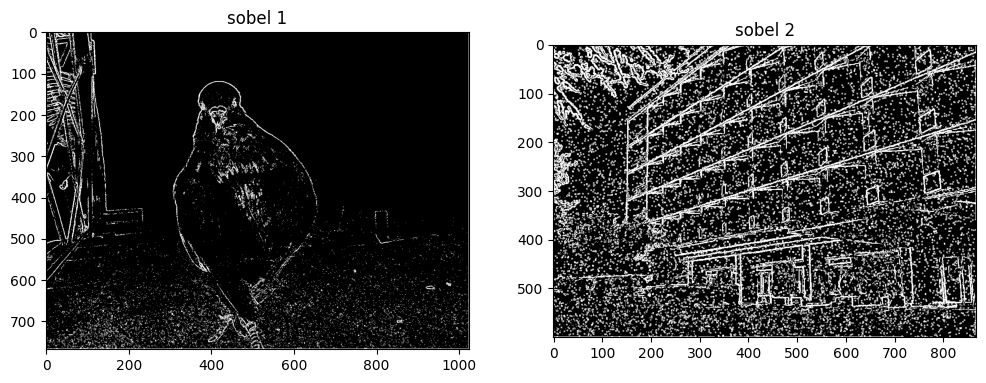

In [90]:
#running for sobel
edges_1_sobel = sobel(noisy_1,40)
edges_2_sobel = sobel(noisy_2,40)
plt.figure("edges for sobel",figsize=(12,10))

# plotting the results
plt.subplot(1,2,1)
plt.imshow(edges_1_sobel)
plt.title("sobel"+" 1")

plt.subplot(1,2,2)
plt.imshow(edges_2_sobel)
plt.title("sobel"+" 2")
plt.show()


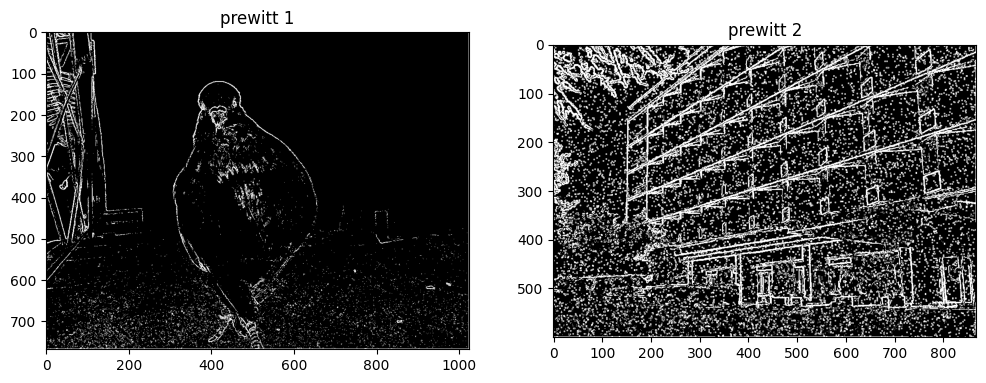

In [91]:
#running for prewitt
edges_1_prewitt = prewitt(noisy_1,40)
edges_2_prewitt = prewitt(noisy_2,40)
# plotting the results
plt.figure("edges for prewitt",figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(edges_1_prewitt)
plt.title("prewitt"+" 1")

plt.subplot(1,2,2)
plt.imshow(edges_2_prewitt)
plt.title("prewitt"+" 2")
plt.show()


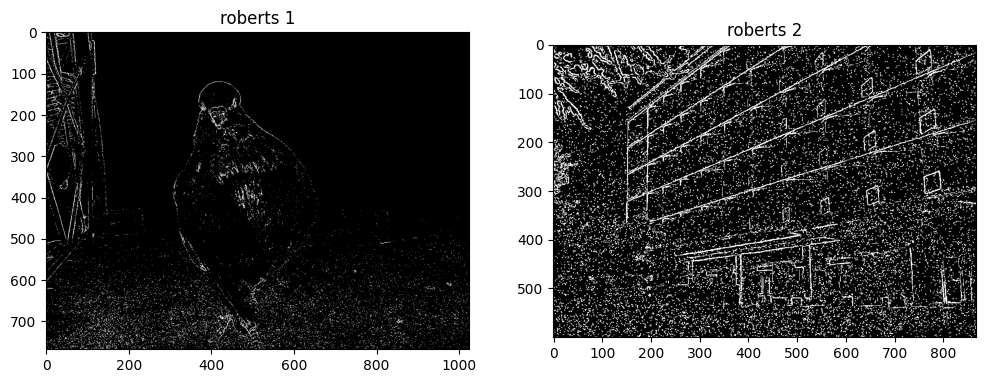

In [92]:
#running for roberts
edges_1_roberts = roberts(noisy_1,40)
edges_2_roberts = roberts(noisy_2,40)
# plotting the results
plt.figure("edges for roberts",figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(edges_1_roberts)
plt.title("roberts"+" 1")

plt.subplot(1,2,2)
plt.imshow(edges_2_roberts)
plt.title("roberts"+" 2")
plt.show()



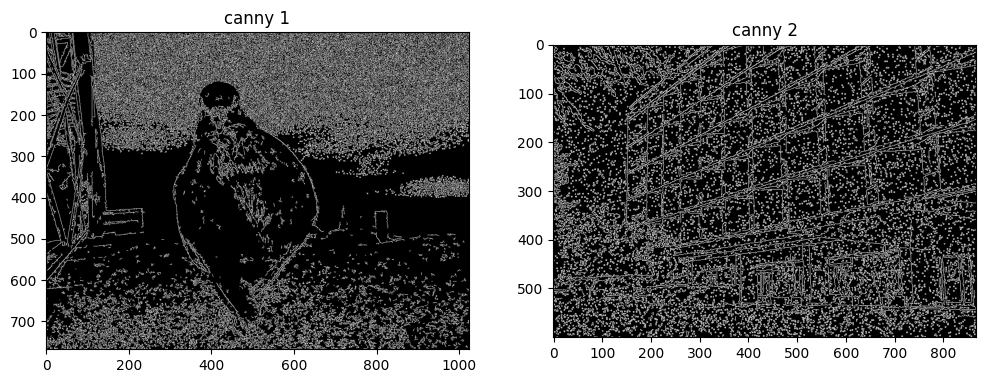

In [93]:
#running for canny
edges_1_canny = canny(noisy_1,100,200)
edges_2_canny = canny(noisy_2,100,200)
# plotting the results
plt.figure("edges for canny",figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(edges_1_canny)
plt.title("canny"+" 1")

plt.subplot(1,2,2)
plt.imshow(edges_2_canny)
plt.title("canny"+" 2")
plt.show()


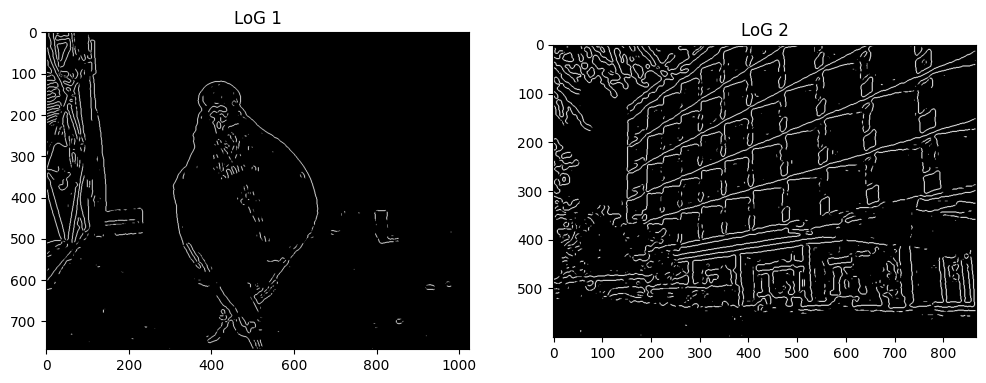

In [94]:
#running for LoG
edges_1_log = LoG(noisy_1)
edges_2_log = LoG(noisy_2)
# plotting the results
plt.figure("edges for LoG",figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(edges_1_log)
plt.title("LoG"+" 1")

plt.subplot(1,2,2)
plt.imshow(edges_2_log)
plt.title("LoG"+" 2")
plt.show()


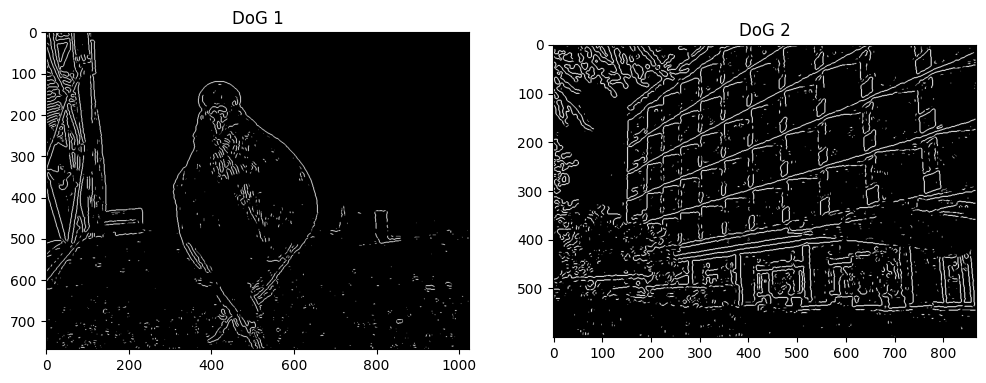

In [95]:
#running for DoG
edges_1_dog = DoG(noisy_1)
edges_2_dog = DoG(noisy_2)
# plotting the results
plt.figure("edges for DoG",figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(edges_1_dog)
plt.title("DoG"+" 1")

plt.subplot(1,2,2)
plt.imshow(edges_2_dog)
plt.title("DoG"+" 2")
plt.show()


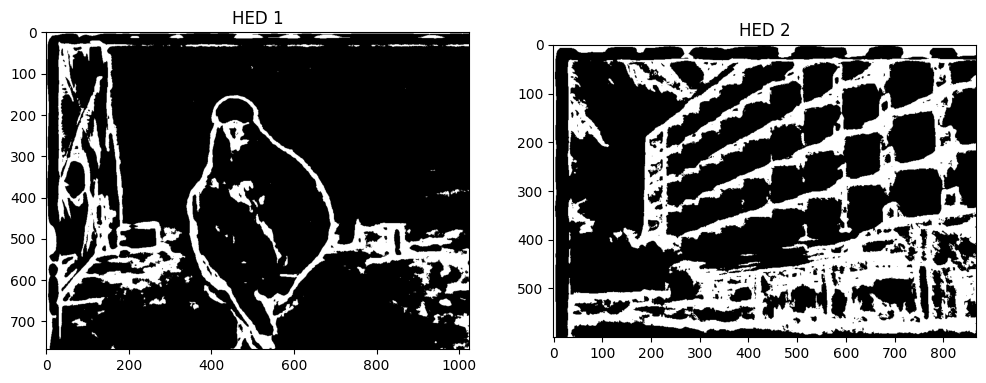

In [96]:
#running for HED
edges_1_hed = HED(noisy_1,30)
edges_2_hed = HED(noisy_2,30)
# plotting the results
plt.figure("edges for HED",figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(edges_1_hed)
plt.title("HED"+" 1")

plt.subplot(1,2,2)
plt.imshow(edges_2_hed)
plt.title("HED"+" 2")
plt.show()


In [97]:
# comparing similarity between images using MSE, PSNR, SSIM
def squaredDifference(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [98]:
# comparing binary edge-maps generated:
func_name=['Sobel','Roberts','Prewitt','Canny','LoG','DoG','HED']
image_1_array=[edges_1_sobel,edges_1_roberts,edges_1_prewitt,edges_1_canny,edges_1_log,edges_1_dog,edges_1_hed]
image_2_array=[edges_2_sobel,edges_2_roberts,edges_2_prewitt,edges_2_canny,edges_2_log,edges_2_dog,edges_2_hed]
MSE_matrix_1=np.zeros((len(func_name),len(func_name)))
for i in range(len(func_name)):
  for j in range(len(func_name)):
    MSE_matrix_1[i][j] = squaredDifference(image_1_array[i],image_1_array[j])
MSE_matrix_2=np.zeros((len(func_name),len(func_name)))
for i in range(len(func_name)):
  for j in range(len(func_name)):
    MSE_matrix_2[i][j] = squaredDifference(image_2_array[i],image_2_array[j])



In [99]:
print(MSE_matrix_1)

[[    0.          3134.69924927   747.54209518 11530.47094345
   3368.36299896  3519.34318542 11784.06143188]
 [ 3134.69924927     0.          2928.403759   12669.68507767
   2779.32529449  3188.77429962 11159.80052948]
 [  747.54209518  2928.403759       0.         11654.08287048
   3016.04833603  3187.86478043 11538.9046669 ]
 [11530.47094345 12669.68507767 11654.08287048     0.
  12807.93199539 12946.84038162 19765.09237289]
 [ 3368.36299896  2779.32529449  3016.04833603 12807.93199539
      0.          1201.72290802 10784.4171524 ]
 [ 3519.34318542  3188.77429962  3187.86478043 12946.84038162
   1201.72290802     0.         11077.28233337]
 [11784.06143188 11159.80052948 11538.9046669  19765.09237289
  10784.4171524  11077.28233337     0.        ]]


In [100]:
print(MSE_matrix_2)

[[    0.         11606.73775922  1767.96082949  7611.47091014
  15974.20031682 15140.78657834 28221.82387673]
 [11606.73775922     0.         12221.27894585 12108.40913018
  11501.73387097 11346.03845046 25842.94268433]
 [ 1767.96082949 12221.27894585     0.          8202.03974654
  16252.62917627 15369.02332949 28398.12053571]
 [ 7611.47091014 12108.40913018  8202.03974654     0.
  14717.39991359 14365.68058756 26688.34259793]
 [15974.20031682 11501.73387097 16252.62917627 14717.39991359
      0.          3927.09547811 24860.07632488]
 [15140.78657834 11346.03845046 15369.02332949 14365.68058756
   3927.09547811     0.         24980.31264401]
 [28221.82387673 25842.94268433 28398.12053571 26688.34259793
  24860.07632488 24980.31264401     0.        ]]


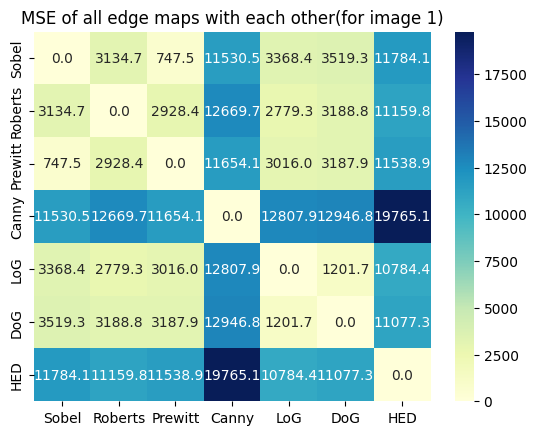

In [101]:
import seaborn as sns
# making a heatmap of all mean squared error values
ax = sns.heatmap(MSE_matrix_1, annot=True, fmt=".1f", cmap="YlGnBu")
ax.set_xticklabels(func_name)
ax.set_yticklabels(func_name)
plt.title("MSE of all edge maps with each other(for image 1)")

plt.show()

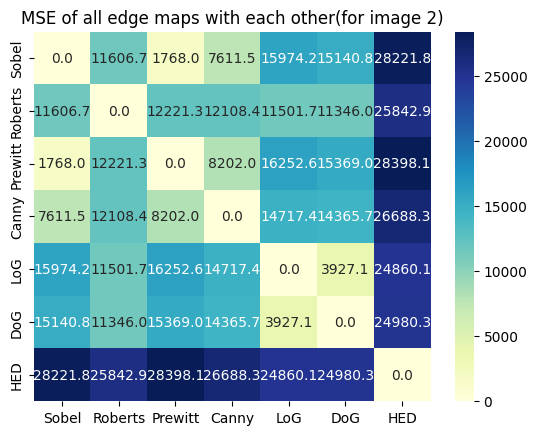

In [102]:
ax = sns.heatmap(MSE_matrix_2, annot=True, fmt=".1f", cmap="YlGnBu")
ax.set_xticklabels(func_name)
ax.set_yticklabels(func_name)
plt.title("MSE of all edge maps with each other(for image 2)")
plt.show()

In [103]:
import math

def PSNR(im1, im2):
    #peak signal to noise ratio
    mse = np.mean((im1 - im2) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
    return psnr



In [104]:
from skimage.metrics import structural_similarity as ssim

def compare_ssim(image1, image2):
  # Calculate SSIM using scikit-image
  score = ssim(image1, image2, full=False)

  return score

In [105]:
# MSE - comparing edge maps with original image
MSE_with_original_image_1=np.zeros(len(func_name))
for i in range(len(func_name)):
    MSE_with_original_image_1[i] = squaredDifference(image_1_array[i],noisy_1)

MSE_with_original_image_2=np.zeros(len(func_name))
for i in range(len(func_name)):
    MSE_with_original_image_2[i] = squaredDifference(image_2_array[i],noisy_2)


In [106]:
# PSNR - comparing edge maps with original image
PSNR_with_original_image_1=np.zeros(len(func_name))
for i in range(len(func_name)):
    PSNR_with_original_image_1[i] = PSNR(image_1_array[i],noisy_1)

PSNR_with_original_image_2=np.zeros(len(func_name))
for i in range(len(func_name)):
    PSNR_with_original_image_2[i] = PSNR(image_2_array[i],noisy_2)

In [107]:
# SSIM - comparing edge maps with original image
SSIM_with_original_image_1=np.zeros(len(func_name))
for i in range(len(func_name)):
    SSIM_with_original_image_1[i] = compare_ssim(image_1_array[i],noisy_1)

SSIM_with_original_image_2=np.zeros(len(func_name))
for i in range(len(func_name)):
    SSIM_with_original_image_2[i] = compare_ssim(image_2_array[i],noisy_2)

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)


In [108]:
results_1 = [MSE_with_original_image_1,PSNR_with_original_image_1,SSIM_with_original_image_1]
results_2 = [MSE_with_original_image_2,PSNR_with_original_image_2,SSIM_with_original_image_2]

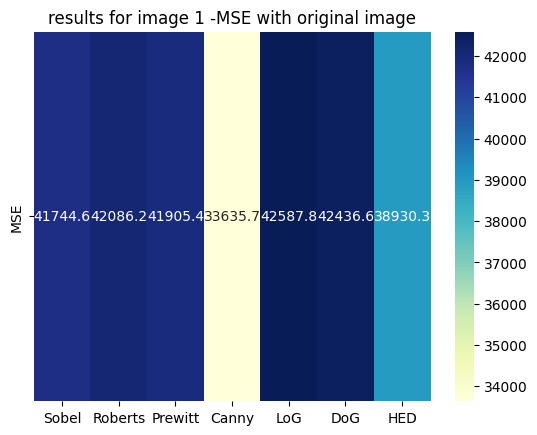

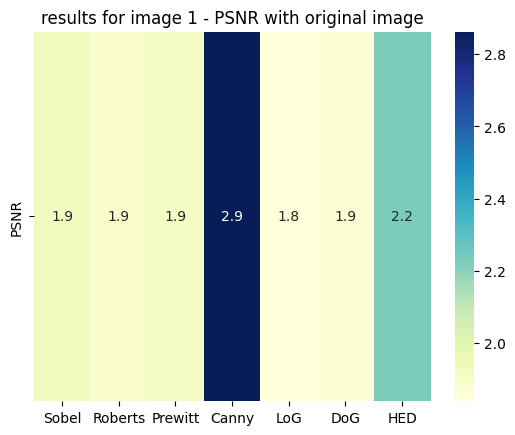

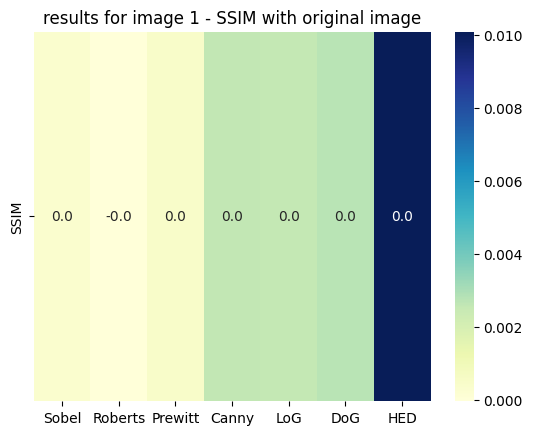

In [109]:
# heatmap for image 1
ax = sns.heatmap(results_1[0].reshape(1,-1), annot=True, fmt=".1f", cmap="YlGnBu")
ax.set_xticklabels(func_name)
ax.set_yticklabels(['MSE'])
plt.title("results for image 1 -MSE with original image")
plt.show()
# heatmap for image 1
ax = sns.heatmap(results_1[1].reshape(1,-1), annot=True, fmt=".1f", cmap="YlGnBu")
ax.set_xticklabels(func_name)
ax.set_yticklabels(['PSNR'])
plt.title("results for image 1 - PSNR with original image")
plt.show()
# heatmap for image 1
ax = sns.heatmap(results_1[2].reshape(1,-1), annot=True, fmt=".1f", cmap="YlGnBu")
ax.set_xticklabels(func_name)
ax.set_yticklabels(['SSIM'])
plt.title("results for image 1 - SSIM with original image")
plt.show()

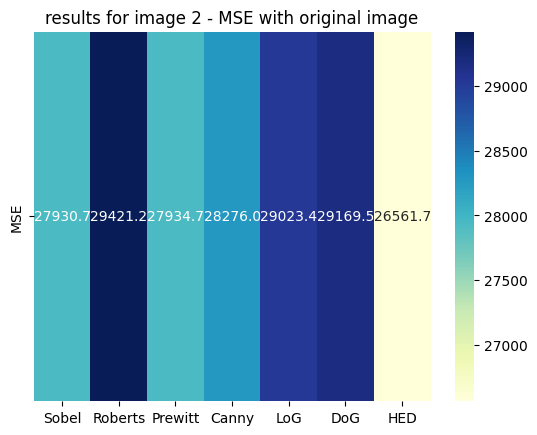

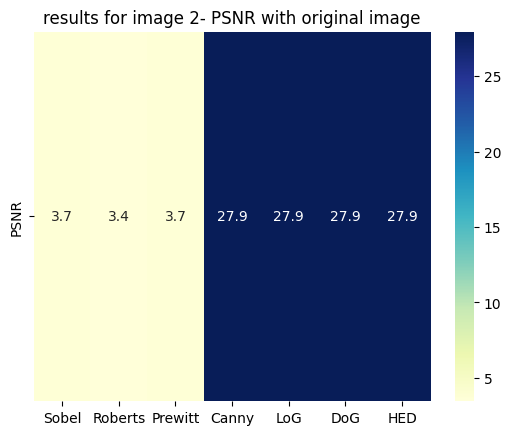

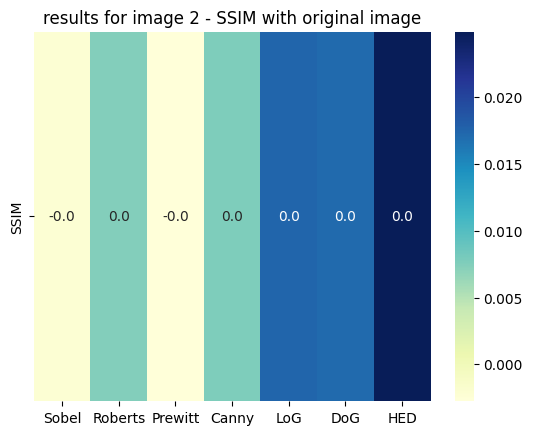

In [110]:
#heatmap for image 2

ax = sns.heatmap(results_2[0].reshape(1,-1), annot=True, fmt=".1f", cmap="YlGnBu")
ax.set_xticklabels(func_name)
ax.set_yticklabels(['MSE'])
plt.title("results for image 2 - MSE with original image")
plt.show()
#heatmap for image 2

ax = sns.heatmap(results_2[1].reshape(1,-1), annot=True, fmt=".1f", cmap="YlGnBu")
ax.set_xticklabels(func_name)
ax.set_yticklabels(['PSNR'])
plt.title("results for image 2- PSNR with original image")
plt.show()
#heatmap for image 2

ax = sns.heatmap(results_2[2].reshape(1,-1), annot=True, fmt=".1f", cmap="YlGnBu")
ax.set_xticklabels(func_name)
ax.set_yticklabels(['SSIM'])
plt.title("results for image 2 - SSIM with original image")
plt.show()

In [111]:
# In summary we chose these 3 parameters to compare the edge detection
# algorithms because we do not have a ground truth image for them
# So the only way to compare is by using MSE,PSNR or SSIM


## Pros and cons of each filter -


**Roberts Filter:**

Pros:
1. Simple and computationally lightweight filter.
2. Effective for detecting edges in images with relatively simple edge structures.
3. Requires minimal memory and computational resources, making it suitable for real-time applications on low-power devices.

Cons:
1. Prone to noise interference, leading to false edge detections, especially in images with high levels of noise.
2. Less effective for detecting edges with complex or curved structures compared to more sophisticated edge detection methods.
3. Limited edge orientation detection capabilities, as it only detects edges along the diagonal directions.

**Sobel Filter:**

Pros:
1. More robust edge detection compared to the Roberts filter, especially in the presence of noise.
2. Able to detect edges along horizontal and vertical directions separately, providing better orientation detection capabilities.
3. Can be easily implemented using convolution operations, making it suitable for real-time image processing applications.

Cons:
1. Requires more computational resources compared to the Roberts filter, particularly for larger kernel sizes.
2. May produce thicker edges compared to other edge detection methods, leading to reduced localization accuracy.
3. Sensitive to variations in image intensity, which can affect edge detection performance, especially in images with uneven illumination.

**Prewitt Filter:**

Pros:
1. Similar to the Sobel filter, the Prewitt filter is effective for detecting edges along horizontal and vertical directions.
2. Provides better noise robustness compared to the Roberts filter, making it suitable for edge detection in noisy images.
3. Can be easily adjusted for different kernel sizes and orientations, allowing for flexibility in edge detection tasks.

Cons:
1. Like the Sobel filter, the Prewitt filter may produce thicker edges, leading to reduced localization accuracy.
2. More computationally intensive than the Roberts filter, especially for larger kernel sizes or when applied to high-resolution images.
3. May suffer from false edge detections in regions with complex textures or patterns, requiring additional post-processing steps for refinement.

**Canny Edge Detector:**

Pros:
1. **Accurate Edge Localization:** Canny edge detector provides precise localization of edges, typically identifying single-pixel wide edges.
2. **Low Error Rate:** It has a low probability of detecting false edges, making it suitable for applications where accuracy is critical.
3. **Multi-Stage Process:** The Canny edge detector involves multiple stages including Gaussian smoothing, gradient calculation, non-maximum suppression, and hysteresis thresholding, which collectively improve edge detection performance.

Cons:
1. **Computationally Expensive:** The multi-stage nature of the Canny edge detector makes it computationally intensive, especially for large images.
2. **Sensitivity to Noise:** While Gaussian smoothing helps reduce noise, the Canny edge detector can still be sensitive to noise in the image, potentially leading to false edge detections.
3. **Tuning Parameters:** Proper selection of parameters such as the Gaussian kernel size and threshold values is crucial for optimal performance, which may require manual adjustment and tuning.

**LoG (Laplacian of Gaussian):**

Pros:
1. **Scale-Space Representation:** LoG filter provides a scale-space representation of the image, allowing for edge detection at multiple scales.
2. **Edge Localization:** Similar to the Canny edge detector, LoG filter can provide precise localization of edges, particularly at different levels of blurring.
3. **Effective for Blobs Detection:** Apart from edge detection, LoG filter is also effective for detecting blobs or regions of interest in an image, due to its response to regions of high curvature.

Cons:
1. **Computationally Intensive:** Computing the LoG involves convolving the image with a Gaussian kernel followed by the Laplacian operator, making it computationally expensive, especially for large images or multiple scales.
2. **Parameter Sensitivity:** The performance of LoG filter can be sensitive to the choice of parameters such as the standard deviation of the Gaussian kernel, which affects the scale of the edges detected.
3. **Edge Thickening:** The LoG filter may result in thicker edges compared to other edge detection methods, which could affect edge localization accuracy.

**DoG (Difference of Gaussians):**

Pros:
1. **Efficient Approximation of LoG:** DoG filter provides an efficient approximation of the LoG filter by subtracting two Gaussian-smoothed images at different scales.
2. **Fast Computation:** Compared to the LoG filter, DoG filter is computationally less expensive, making it suitable for real-time applications and large-scale image processing.
3. **Scale-Space Representation:** Similar to LoG, DoG filter also provides a scale-space representation of the image, enabling edge detection at different levels of blurring.

Cons:
1. **Parameter Selection:** The performance of DoG filter depends on the choice of parameters such as the standard deviations of the Gaussian kernels and the scale of the difference.
2. **Edge Localization:** While DoG filter provides edge detection at multiple scales, the localization of edges may not be as precise as methods like the Canny edge detector.
3. **Sensitivity to Noise:** Like other Gaussian-based methods, DoG filter may be sensitive to noise in the image, potentially leading to false edge detections, especially at lower scales.

**Pros:**

1. **High Accuracy:** HED edge detector leverages deep neural networks to achieve high accuracy in edge detection tasks. It can capture fine details and intricate edge structures in images, making it suitable for applications requiring precise edge localization.

2. **Multi-Scale Edge Detection:** HED employs a multi-scale approach, allowing it to detect edges at different levels of abstraction. This enables the detection of edges at both fine and coarse scales, improving the overall edge detection performance.

3. **End-to-End Training:** The HED model is trained end-to-end, which means that the entire network is optimized jointly for edge detection. This approach enables the network to learn complex edge features and relationships directly from the data, leading to better generalization performance.

4. **Efficient Inference:** Despite its deep architecture, HED is designed to be computationally efficient during inference. This makes it suitable for real-time edge detection applications, such as video processing and robotics, where low-latency performance is critical.

5. **Robustness to Variations:** HED edge detector exhibits robustness to variations in image content, lighting conditions, and noise levels. It can detect edges in diverse environments and under challenging conditions, making it suitable for a wide range of practical applications.

**Cons:**

1. **Complexity of Implementation:** Implementing the HED edge detector typically requires expertise in deep learning and familiarity with neural network architectures. Integrating HED into existing applications may require significant effort and resources.

2. **Training Data Requirements:** Training a high-performance HED model requires a large and diverse dataset of labeled images with ground truth edge annotations. Collecting and annotating such datasets can be time-consuming and expensive.

3. **Fine-Tuning for Specific Domains:** While HED is a general-purpose edge detector, fine-tuning may be necessary to achieve optimal performance in specific application domains or datasets. This process may require additional labeled data and computational resources.

4. **Computational Resources:** Training and inference with deep neural networks like HED can be computationally demanding, especially on resource-constrained devices or platforms. High-performance hardware such as GPUs or TPUs may be required to achieve real-time performance.

5. **Interpretability:** Like other deep learning models, the internal workings of the HED edge detector may lack interpretability, making it challenging to understand why certain edge detections are made in specific cases. This can limit its applicability in domains where interpretability is essential, such as medical imaging or safety-critical systems.
